In [71]:
import numpy as np
import pandas as pd

In [72]:
df = pd.read_csv('data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [73]:
df.isnull().sum().sum()

343248

In [74]:
thresh = df.shape[0]*0.6
df = df.dropna(thresh=thresh, axis = 1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Cloud9am       89572 non-null   float64
 16  Temp9am        143693 non-null  float64
 17  Temp3pm        141851 non-nul

In [76]:
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Cloud9am       89572 non-null   float64
 16  Temp9am        143693 non-null  float64
 17  Temp3pm        141851 non-nul

In [78]:
df['RainToday'].mean()

0.22419285648984874

In [79]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df = df.drop(['Date'], axis = 1)
month_rain = df.groupby('Month').mean(numeric_only=True)
month_rain['RainToday'].sort_values(ascending = False)

Month
7     0.270736
6     0.263638
8     0.253167
9     0.229135
5     0.222163
3     0.217135
4     0.216845
12    0.213037
11    0.210843
2     0.206746
10    0.196512
1     0.189484
Name: RainToday, dtype: float64

In [80]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df = pd.get_dummies(df, columns= categoricals)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 124 entries, MinTemp to WindDir3pm_WSW
dtypes: bool(109), float64(15)
memory usage: 31.8 MB


In [82]:
df = df.dropna(how = 'any', axis = 0)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78257 entries, 0 to 145458
Columns: 124 entries, MinTemp to WindDir3pm_WSW
dtypes: bool(109), float64(15)
memory usage: 17.7 MB


In [84]:
from sklearn import model_selection

In [85]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [86]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.3, random_state=31)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (54779, 123)
Test shape: (23478, 123)


In [87]:
y_test.mean()

0.22770253002811142

In [88]:
def gbs(data, n):     
    inds = np.random.randint(0, len(data), (n, len(data))) #определяем индексы случайным образом
    numbers = data[inds] #выбираем значения по индексам
    return numbers
target = X_train['MinTemp'].values #выбираем целевую переменную
np.random.seed(31) #задаём параметр генератора случайных чисел
mean_values = [np.mean(x) for x in gbs(target, 1000)] #получаем все средние значения
np.std(mean_values) #находим для них стандартное отклонение

0.02879072820657669

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f'Roc_auc for lr {round(metrics.roc_auc_score(y_test, y_pred_lr),2)}')

Roc_auc for lr 0.73


c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4], 'max_depth': [5,7,9,11]}
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 42), param_grid=params, cv = 3, n_jobs=-1)
grid_search.fit(X_train, y_train)
y_pred_gs = grid_search.predict(X_test)
print(f'Roc_auc for lr {round(metrics.roc_auc_score(y_test, y_pred_gs),2)}')


Roc_auc for lr 0.7


In [92]:
print(f'Best params: {grid_search.best_params_}')

Best params: {'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}


In [93]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 31)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f'Roc_auc for lr {round(metrics.roc_auc_score(y_test, y_pred_rf),2)}')

Roc_auc for lr 0.73


In [94]:
params = {'max_features': [ 4, 5, 6, 7], 'min_samples_leaf': [3, 5, 7, 9, 11], 'max_depth': [5, 10, 15]}
grid_searh2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators = 100, random_state = 31), param_grid=params, cv = 3, n_jobs=-1)
grid_searh2.fit(X_train, y_train)
y_pred_gs2 = grid_searh2.predict(X_test)
print(f'Roc_auc for lr {round(metrics.roc_auc_score(y_test, y_pred_gs2),2)}')

Roc_auc for lr 0.7


<Axes: >

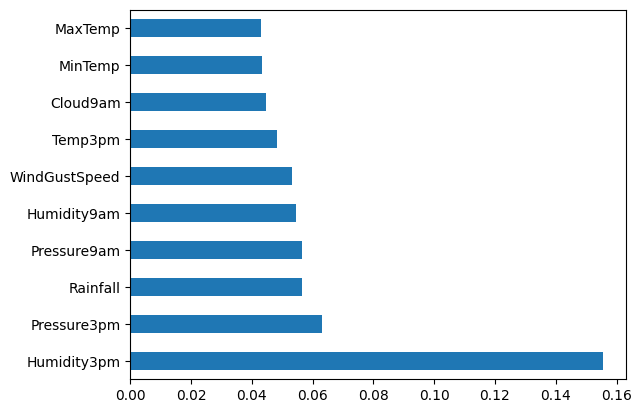

In [102]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 31)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns)
feature_importances.sort_values(ascending=False).nlargest(10).plot(kind='barh')

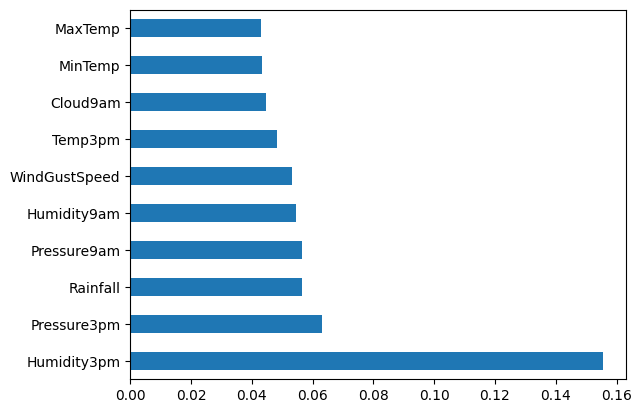

In [114]:
feature_names = [x for x in df if x != 'RainTomorrow']
clf = RandomForestClassifier(n_estimators = 100, random_state = 31)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
feature = pd.Series(importances, feature_names).sort_values(ascending=False).nlargest(10).plot(kind='barh')